In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import io

# Carregando os dados fornecidos
csv_data = """Annual Food Spending ($),Annual Household Income ($),Non mortgage household debt ($),Region (1:NE;2:MW;3:S;4:W),Location (1: Metro;2:Outside Metro)
8909,56697,23180,1,1
5684,35945,7052,1,1
10706,52687,16149,1,1
14112,74041,21839,1,1
13855,63182,18866,1,1
15619,79064,21899,1,1
2694,25981,8774,1,1
9127,57424,15766,1,1
13514,72045,27685,1,1
6314,38046,8545,1,1
7622,52408,28057,1,1
4322,41405,6998,1,1
3805,29684,4806,1,1
6674,49246,13592,1,1
7347,41491,4088,1,1
2911,26703,15876,1,1
8026,48753,16714,1,1
8567,55555,16783,1,1
10345,71483,21407,1,1
8694,50980,19114,1,1
8821,46403,7817,1,1
8678,51927,14415,1,1
14331,84769,17295,1,1
9619,59062,16687,1,1
9286,57952,14161,1,1
8206,58355,19538,1,1
16408,81694,15187,1,1
12757,69522,14651,1,1
17740,96132,0,1,1
7739,57796,22057,1,1
15383,88276,1896,1,1
4579,32264,7979,1,1
11679,65928,0,1,1
12877,69924,27330,1,1
16232,91108,9876,1,1
9621,54070,19908,1,1
8171,47238,17819,1,1
12128,77427,31340,1,1
8642,59805,4963,1,1
12400,60334,6632,1,1
9185,54114,18593,1,2
7862,40680,15202,1,2
9775,58263,1486,1,2
6771,52008,21713,1,2
3059,39643,12179,1,2
13211,70309,13221,1,2
7408,46450,5602,1,2
11581,76140,33874,1,2
14233,80833,11478,1,2
3352,31899,2762,1,2
2630,21647,2663,1,2
9093,65924,11355,1,2
12652,65923,5132,1,2
9559,62811,12613,1,2
6112,42335,3149,1,2
10431,65134,15196,1,2
12630,64621,21433,1,2
4578,36553,5502,1,2
9551,62910,11376,1,2
10262,70727,13287,1,2
9551,57634,11857,2,1
10143,56549,16136,2,1
8955,59662,11627,2,1
10197,57350,18432,2,1
11234,56447,10871,2,1
9320,61136,0,2,1
9089,51526,4902,2,1
12300,79979,17270,2,1
11484,66733,15145,2,1
11215,75359,15611,2,1
7204,40795,8975,2,1
5579,39128,6576,2,1
11723,75482,12508,2,1
9353,63998,0,2,1
7761,45845,6671,2,1
4261,38223,8576,2,1
9830,66787,1178,2,1
12386,77852,936,2,1
8673,55825,14167,2,1
10944,57022,9018,2,1
9910,64263,12768,2,1
9928,75881,17423,2,1
4264,34343,21323,2,1
7971,41243,21009,2,1
8290,53021,20151,2,1
12669,66991,9250,2,1
7272,49719,20838,2,1
9784,58399,16065,2,1
9187,50477,9407,2,1
5866,39112,20409,2,1
9456,51886,11668,2,2
6270,34797,146,2,2
9518,62348,5201,2,2
10968,78704,17002,2,2
8865,53620,32004,2,2
9226,51577,15922,2,2
4913,34761,17704,2,2
6976,60968,17799,2,2
8152,51281,8167,2,2
2887,25013,18763,2,2
8062,59238,10815,2,2
8895,47344,11814,2,2
8444,52645,22469,2,2
6148,35309,17139,2,2
4563,34355,10612,2,2
8185,50630,21187,3,1
3391,29056,15735,3,1
7436,48721,18363,3,1
9522,50459,16478,3,1
11290,72805,21238,3,1
10403,56954,22218,3,1
4693,39343,24696,3,1
5626,38833,14371,3,1
11869,55021,35576,3,1
13055,77605,817,3,1
8783,57937,18591,3,1
13031,63343,25531,3,1
3681,36479,17950,3,1
5549,40381,14257,3,1
4108,26309,26581,3,1
6314,41421,22470,3,1
7700,54579,29065,3,1
7479,40551,31757,3,1
9093,50369,6404,3,1
9863,54422,24334,3,1
8043,51836,26213,3,2
9552,73600,36374,3,2
9286,51873,29631,3,2
7987,48003,17261,3,2
3875,36519,13579,3,2
10746,75152,10659,3,2
6888,44974,23711,3,2
5479,48923,4594,3,2
6949,43769,21221,3,2
10650,75947,33357,3,2
5188,41423,33641,3,2
5311,40189,17791,3,2
4691,36772,5829,3,2
8056,59690,19594,3,2
11304,53654,23066,3,2
8112,59067,240,3,2
8696,65962,0,3,2
5869,37254,10157,3,2
3776,33568,14143,3,2
11829,56934,0,3,2
13087,88822,17565,4,1
10986,59635,27863,4,1
5762,38407,18867,4,1
11617,78627,11894,4,1
9895,47710,22930,4,1
16293,64443,31687,4,1
8185,58871,35424,4,1
13972,87954,11549,4,1
11243,54778,12552,4,1
4635,39825,19494,4,1
10063,49536,12195,4,1
8426,60102,13787,4,1
7436,49139,22356,4,1
11747,51052,4553,4,1
15397,70500,12025,4,1
6842,54894,16217,4,1
9678,60570,4106,4,1
12852,57625,31228,4,1
10114,56956,25907,4,1
8496,61400,1093,4,1
6689,50532,17106,4,1
15696,72774,17793,4,1
9841,69981,21607,4,1
12529,66891,17689,4,1
10210,67431,19995,4,1
8868,64782,14489,4,1
6426,38987,17864,4,1
11096,64867,5839,4,1
10086,50421,8689,4,1
2587,27076,17534,4,1
12492,51784,20284,4,2
8456,54135,22037,4,2
6801,53291,23342,4,2
6339,49804,34943,4,2
7802,52205,28579,4,2
9717,72841,22349,4,2
6026,46238,20165,4,2
5618,45938,10538,4,2
10217,77716,18516,4,2
8338,59711,7980,4,2
9048,42106,19786,4,2
4017,36462,9935,4,2
10906,53403,18177,4,2
15148,71290,6696,4,2
8830,66759,20972,4,2
8481,57616,28767,4,2
11358,76221,1373,4,2
10553,78202,5920,4,2
6969,55164,24795,4,2
13219,61171,21482,4,2
3543,34093,25969,4,2
7326,50647,10750,4,2
8458,59898,22940,4,2
11766,52884,25970,4,2
9908,73629,7112,4,2"""

df = pd.read_csv(io.StringIO(csv_data))

# Renomeando as colunas para facilitar a manipulação (removendo espaços e cifrões)
df.columns = ['Food_Spending', 'Household_Income', 'Household_Debt', 'Region', 'Location']

# Exibindo as primeiras linhas para confirmação
print("Dados carregados com sucesso!")
print(df.head())
print("-" * 30)
print(df.info())

Dados carregados com sucesso!
   Food_Spending  Household_Income  Household_Debt  Region  Location
0           8909             56697           23180       1         1
1           5684             35945            7052       1         1
2          10706             52687           16149       1         1
3          14112             74041           21839       1         1
4          13855             63182           18866       1         1
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Food_Spending     200 non-null    int64
 1   Household_Income  200 non-null    int64
 2   Household_Debt    200 non-null    int64
 3   Region            200 non-null    int64
 4   Location          200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB
None


In [2]:
import pandas as pd
import statsmodels.api as sm
import io

# Carregando os dados
csv_data = """Annual Food Spending ($),Annual Household Income ($),Non mortgage household debt ($),Region (1:NE;2:MW;3:S;4:W),Location (1: Metro;2:Outside Metro)
8909,56697,23180,1,1
5684,35945,7052,1,1
10706,52687,16149,1,1
14112,74041,21839,1,1
13855,63182,18866,1,1
15619,79064,21899,1,1
2694,25981,8774,1,1
9127,57424,15766,1,1
13514,72045,27685,1,1
6314,38046,8545,1,1
7622,52408,28057,1,1
4322,41405,6998,1,1
3805,29684,4806,1,1
6674,49246,13592,1,1
7347,41491,4088,1,1
2911,26703,15876,1,1
8026,48753,16714,1,1
8567,55555,16783,1,1
10345,71483,21407,1,1
8694,50980,19114,1,1
8821,46403,7817,1,1
8678,51927,14415,1,1
14331,84769,17295,1,1
9619,59062,16687,1,1
9286,57952,14161,1,1
8206,58355,19538,1,1
16408,81694,15187,1,1
12757,69522,14651,1,1
17740,96132,0,1,1
7739,57796,22057,1,1
15383,88276,1896,1,1
4579,32264,7979,1,1
11679,65928,0,1,1
12877,69924,27330,1,1
16232,91108,9876,1,1
9621,54070,19908,1,1
8171,47238,17819,1,1
12128,77427,31340,1,1
8642,59805,4963,1,1
12400,60334,6632,1,1
9185,54114,18593,1,2
7862,40680,15202,1,2
9775,58263,1486,1,2
6771,52008,21713,1,2
3059,39643,12179,1,2
13211,70309,13221,1,2
7408,46450,5602,1,2
11581,76140,33874,1,2
14233,80833,11478,1,2
3352,31899,2762,1,2
2630,21647,2663,1,2
9093,65924,11355,1,2
12652,65923,5132,1,2
9559,62811,12613,1,2
6112,42335,3149,1,2
10431,65134,15196,1,2
12630,64621,21433,1,2
4578,36553,5502,1,2
9551,62910,11376,1,2
10262,70727,13287,1,2
9551,57634,11857,2,1
10143,56549,16136,2,1
8955,59662,11627,2,1
10197,57350,18432,2,1
11234,56447,10871,2,1
9320,61136,0,2,1
9089,51526,4902,2,1
12300,79979,17270,2,1
11484,66733,15145,2,1
11215,75359,15611,2,1
7204,40795,8975,2,1
5579,39128,6576,2,1
11723,75482,12508,2,1
9353,63998,0,2,1
7761,45845,6671,2,1
4261,38223,8576,2,1
9830,66787,1178,2,1
12386,77852,936,2,1
8673,55825,14167,2,1
10944,57022,9018,2,1
9910,64263,12768,2,1
9928,75881,17423,2,1
4264,34343,21323,2,1
7971,41243,21009,2,1
8290,53021,20151,2,1
12669,66991,9250,2,1
7272,49719,20838,2,1
9784,58399,16065,2,1
9187,50477,9407,2,1
5866,39112,20409,2,1
9456,51886,11668,2,2
6270,34797,146,2,2
9518,62348,5201,2,2
10968,78704,17002,2,2
8865,53620,32004,2,2
9226,51577,15922,2,2
4913,34761,17704,2,2
6976,60968,17799,2,2
8152,51281,8167,2,2
2887,25013,18763,2,2
8062,59238,10815,2,2
8895,47344,11814,2,2
8444,52645,22469,2,2
6148,35309,17139,2,2
4563,34355,10612,2,2
8185,50630,21187,3,1
3391,29056,15735,3,1
7436,48721,18363,3,1
9522,50459,16478,3,1
11290,72805,21238,3,1
10403,56954,22218,3,1
4693,39343,24696,3,1
5626,38833,14371,3,1
11869,55021,35576,3,1
13055,77605,817,3,1
8783,57937,18591,3,1
13031,63343,25531,3,1
3681,36479,17950,3,1
5549,40381,14257,3,1
4108,26309,26581,3,1
6314,41421,22470,3,1
7700,54579,29065,3,1
7479,40551,31757,3,1
9093,50369,6404,3,1
9863,54422,24334,3,1
8043,51836,26213,3,2
9552,73600,36374,3,2
9286,51873,29631,3,2
7987,48003,17261,3,2
3875,36519,13579,3,2
10746,75152,10659,3,2
6888,44974,23711,3,2
5479,48923,4594,3,2
6949,43769,21221,3,2
10650,75947,33357,3,2
5188,41423,33641,3,2
5311,40189,17791,3,2
4691,36772,5829,3,2
8056,59690,19594,3,2
11304,53654,23066,3,2
8112,59067,240,3,2
8696,65962,0,3,2
5869,37254,10157,3,2
3776,33568,14143,3,2
11829,56934,0,3,2
13087,88822,17565,4,1
10986,59635,27863,4,1
5762,38407,18867,4,1
11617,78627,11894,4,1
9895,47710,22930,4,1
16293,64443,31687,4,1
8185,58871,35424,4,1
13972,87954,11549,4,1
11243,54778,12552,4,1
4635,39825,19494,4,1
10063,49536,12195,4,1
8426,60102,13787,4,1
7436,49139,22356,4,1
11747,51052,4553,4,1
15397,70500,12025,4,1
6842,54894,16217,4,1
9678,60570,4106,4,1
12852,57625,31228,4,1
10114,56956,25907,4,1
8496,61400,1093,4,1
6689,50532,17106,4,1
15696,72774,17793,4,1
9841,69981,21607,4,1
12529,66891,17689,4,1
10210,67431,19995,4,1
8868,64782,14489,4,1
6426,38987,17864,4,1
11096,64867,5839,4,1
10086,50421,8689,4,1
2587,27076,17534,4,1
12492,51784,20284,4,2
8456,54135,22037,4,2
6801,53291,23342,4,2
6339,49804,34943,4,2
7802,52205,28579,4,2
9717,72841,22349,4,2
6026,46238,20165,4,2
5618,45938,10538,4,2
10217,77716,18516,4,2
8338,59711,7980,4,2
9048,42106,19786,4,2
4017,36462,9935,4,2
10906,53403,18177,4,2
15148,71290,6696,4,2
8830,66759,20972,4,2
8481,57616,28767,4,2
11358,76221,1373,4,2
10553,78202,5920,4,2
6969,55164,24795,4,2
13219,61171,21482,4,2
3543,34093,25969,4,2
7326,50647,10750,4,2
8458,59898,22940,4,2
11766,52884,25970,4,2
9908,73629,7112,4,2"""

df = pd.read_csv(io.StringIO(csv_data))
df.columns = ['Food_Spending', 'Household_Income', 'Household_Debt', 'Region', 'Location']

# Definindo as variáveis
X = df['Household_Income']
y = df['Food_Spending']

# Adicionando a constante (intercepto)
X = sm.add_constant(X)

# Criando e ajustando o modelo
model = sm.OLS(y, X).fit()

# Obtendo o R-quadrado
r_squared = model.rsquared
print(f"R-quadrado: {r_squared:.4f}")
print(f"R-quadrado (%): {r_squared * 100:.2f}%")

R-quadrado: 0.7385
R-quadrado (%): 73.85%


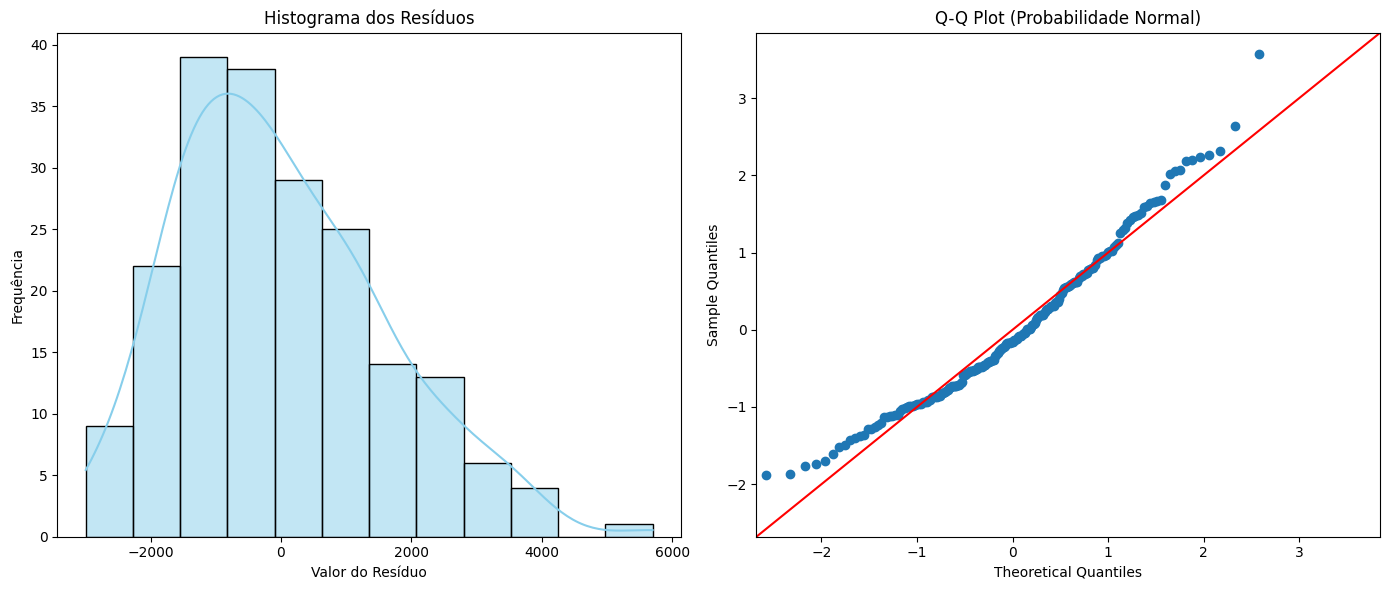

P-valor do teste de Shapiro-Wilk: 0.0002


In [3]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# 1. Calcular os resíduos do modelo anterior
residuals = model.resid

# Configuração dos gráficos
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# 2. Histograma com curva de densidade
sns.histplot(residuals, kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Histograma dos Resíduos')
ax[0].set_xlabel('Valor do Resíduo')
ax[0].set_ylabel('Frequência')

# 3. Q-Q Plot (Gráfico de Probabilidade Normal)
sm.qqplot(residuals, line='45', fit=True, ax=ax[1])
ax[1].set_title('Q-Q Plot (Probabilidade Normal)')

plt.tight_layout()
plt.show()

# Teste estatístico de Shapiro-Wilk (opcional para confirmação)
stat, p_value = stats.shapiro(residuals)
print(f"P-valor do teste de Shapiro-Wilk: {p_value:.4f}")

In [4]:
# Definindo as variáveis para o segundo modelo
y_debt = df['Household_Debt']
X = df['Household_Income']
X = sm.add_constant(X) # Adiciona o intercepto

# Criando e ajustando o modelo para Dívida
model_debt = sm.OLS(y_debt, X).fit()

# Exibindo a comparação
print(f"R² (Modelo 1 - Alimentação): 0.7385")
print(f"R² (Modelo 2 - Dívida):      {model_debt.rsquared:.4f}")

if model_debt.rsquared < 0.5:
    print("\nConclusão: O modelo de dívida tem um ajuste MUITO pior.")
else:
    print("\nConclusão: Os modelos são comparáveis.")

R² (Modelo 1 - Alimentação): 0.7385
R² (Modelo 2 - Dívida):      0.0000

Conclusão: O modelo de dívida tem um ajuste MUITO pior.
